In [1]:
import pickle
from aemulusnu_massfunction.emulator import *
from aemulusnu_massfunction.fisher_utils import *

loading emulator from /oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_loBox0_1400.pkl


In [2]:
# fiducial_cosmology = {'10^9 As':2.09681,
#                       'ns': 0.9652,
#                       'H0': 67.37,
#                       'w0': -1,
#                       'ombh2': 0.02233,
#                       'omch2': 0.1198,
#                       'nu_mass_ev': 0.07,} #this line changed

# fiducial_cosmo_vals = emulator.get_cosmo_vals(fiducial_cosmology)

# fiducial_ccl_cosmo = None

# fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))

In [3]:
emulator = AemulusNu_HMF_Emulator(emulator_loc = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_loBox_n50_0_1400.pkl')


loading emulator from /oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_loBox_n50_0_1400.pkl


In [4]:
M = 10**np.linspace(11, 16, 150)

In [5]:
h = fiducial_cosmology['H0']/100

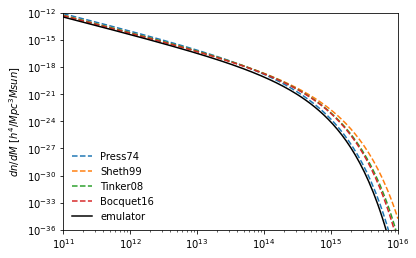

In [14]:
dn_dM = [emulator.predict_dndM(fiducial_cosmology, 1, M_c) for M_c in M]# h^4 / Mpc^3 Msun

hmfs = []
# Press & Schechter mass function
hmfs.append(ccl.halos.MassFuncPress74(mass_def='200m', mass_def_strict=False))

# Sheth & Tormen mass function
hmfs.append(ccl.halos.MassFuncSheth99(mass_def='200m', mass_def_strict=False))

# Tinker 2008 mass function
hmfs.append(ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False))


# Bocquet 2016 mass function
hmfs.append(ccl.halos.MassFuncBocquet16(mass_def='200m'))

# # Bocquet 2020 mass function
# hmfs.append(ccl.halos.MassFuncBocquet20(mass_def='200m', mass_def_strict=False))

# Let's plot all of them at z=0
plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(0.8))
    plt.plot(M, nm/(h**4 * M * np.log(10)), '--', label=mf.name)
    
plt.plot(M, dn_dM, 'k',label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-36, 1e-12)
plt.xlim(1e11, 1e16)
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)

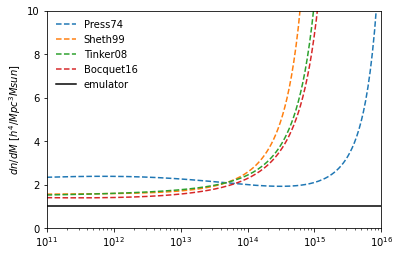

In [15]:

# Let's plot all of them at z=0
plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(0.8))
    plt.plot(M, nm/(h**4 * M * np.log(10))/dn_dM, '--', label=mf.name)
    
plt.plot(M, np.ones_like(dn_dM), 'k',label='emulator')
plt.xscale('log')
# plt.yscale('log')
# plt.ylim(1e-36, 1e-12)
plt.ylim(0, 10)
plt.xlim(1e11, 1e16)
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)

In [16]:
mf(fiducial_ccl_cosmo, 1e13/h, redshiftToScale(0.8))

0.000232266009924391

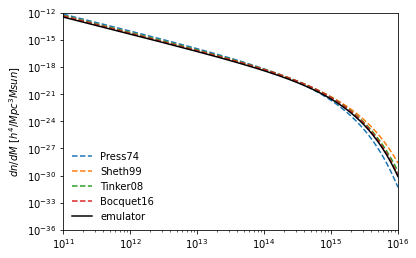

In [17]:
z = 0.2


dn_dM = [emulator.predict_dndM(fiducial_cosmology, z, M_c) for M_c in M]# h^4 / Mpc^3 Msun

plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(z))
    plt.plot(M, nm/(h**4 * M * np.log(10)), '--', label=mf.name)
    
plt.plot(M, dn_dM, 'k', label='emulator')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.ylim(1e-36, 1e-12)
plt.xlim(1e11, 1e16)

plt.legend(frameon=False)

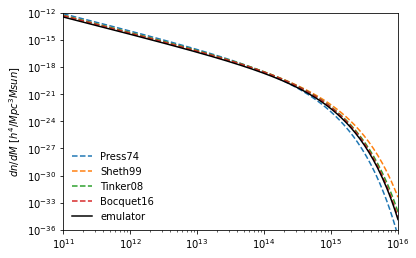

In [18]:
z = .6


dn_dM = [emulator.predict_dndM(fiducial_cosmology, z, M_c) for M_c in M]# h^4 / Mpc^3 Msun

plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(z))
    plt.plot(M, nm/(h**4 * M * np.log(10)), '--', label=mf.name)
    
plt.plot(M, dn_dM, 'k',label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.ylim(1e-36, 1e-12)
plt.xlim(1e11, 1e16)

plt.legend(frameon=False)

In [19]:
cosmo_dict_2 = {key:fiducial_cosmology[key] for key in fiducial_cosmology}
print(cosmo_dict_2)
cosmo_dict_2['w0'] = -.5
ccl_cosmo_2 = get_ccl_cosmology(tuple(emulator.get_cosmo_vals(cosmo_dict_2)))

{'10^9 As': 2.09681, 'ns': 0.9652, 'H0': 67.37, 'w0': -1, 'ombh2': 0.02233, 'omch2': 0.1198, 'nu_mass_ev': 0.07}


[-0.04487334 -0.04144502 -0.03794278 -0.03436485 -0.03070946 -0.0269748
 -0.02315899 -0.01926014 -0.01527632 -0.01120554 -0.00704579 -0.002795
  0.00154892  0.0059881   0.01052472  0.01516101  0.01989923  0.02474168
  0.02969071  0.03474869  0.03991802  0.04520113  0.05060049  0.05611861
  0.06175803  0.0675213   0.073411    0.07942975  0.08558021  0.09186505
  0.09828695  0.1048486   0.11155268  0.11840189  0.12539887  0.13254629
  0.13984681  0.14730307  0.15491768  0.16269321  0.17063219  0.17873709
  0.18701035  0.19545429  0.20407115  0.21286309  0.22183212  0.23098012
  0.24030886  0.24981997  0.25951491  0.26939493  0.27946108  0.28971416
  0.30015474  0.31078311  0.32159925  0.33260284  0.34379319  0.35516922
  0.36672946  0.37847199  0.39039448  0.40249408  0.41476741  0.42721055
  0.43981896  0.45258749  0.46551032  0.478581    0.49179231  0.50513629
  0.5186042   0.53218648  0.5458727   0.55965164  0.57351117  0.58743829
  0.60141904  0.61543857  0.62948107  0.64352985  0.65

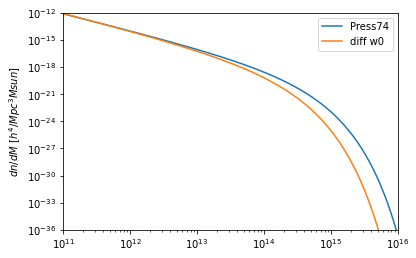

In [20]:
mf = hmfs[0]

nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(z))
plt.plot(M, nm/(h**4 * M * np.log(10)), label=mf.name)


nm2 = mf(ccl_cosmo_2, M/h, redshiftToScale(z))
plt.plot(M, nm2/(h**4 * M * np.log(10)), label='diff w0')

print((nm - nm2)/nm)


plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.ylim(1e-36, 1e-12)
plt.xlim(1e11, 1e16)
plt.legend()
